In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import sys
import os.path
import matplotlib.pyplot as plt
import seaborn as sbn
from IPython.display import display

sys.path.append(os.path.dirname("../"))

from plugins.FaxDistiller import Distill

In [2]:
raw_file   = "../data/FakeWaveform_raw/XENON1T-0-000000000-000000999-000001000.zip"
truth_file = "../data/FakeWaveform_truth.csv"

### Load FAX raw data and distill down into useful parts

In [3]:
distiller = Distill(raw_file, truth_file)
distiller.load()

100%|██████████| 1000/1000 [00:01<00:00, 569.79it/s]


### The way to retrieve distilled data

In [4]:
### Distill.get() returns iterator of distilled data for the event (objects of the Condensate() class)
event = distiller.get(1).__next__()
event.get_event().head()

,baseline,channel,event_number,left,length,max_waveform_length,right,waveform
0,NaN,0,0,82764,158,158,82921,"[16002, 16006, 15998, 16006, 16000, 16003, 159..."
1,NaN,2,0,82646,284,284,82929,"[15999, 16001, 16003, 16003, 16004, 16005, 160..."
2,NaN,3,0,82738,130,130,82867,"[16001, 15999, 16002, 15999, 16001, 16000, 160..."
3,NaN,4,0,82698,198,198,82895,"[16006, 16002, 16008, 16003, 16008, 16004, 160..."
4,NaN,5,0,72794,100,100,72893,"[16002, 16002, 16005, 16007, 16004, 16006, 160..."


In [5]:
print(type(event.get_event()))
      
event.get_event().columns.values

<class 'pandas.core.frame.DataFrame'>


array(['baseline', 'channel', 'event_number', 'left', 'length',
       'max_waveform_length', 'right', 'waveform'], dtype=object)

In [6]:
print(event.__doc__)


        Class of distilled FAX events.
        
        Methods:
            : get_events() : Returns pandas.DataFrame with core information on pulses in the event.
            : get_waveforms_in_channel() : Returns pandas.DataFrame with reconstructed waveforms per
                                           channel (pmt) for the event.
            : get_event_truth() : Returns pandas.DataFrame with FAX truth information on the event
    


### Loop over events and store distilled data for each event

In [7]:
events = []
waveforms_in_channels = []
event_truths = []

nEventsGeant = 1000

for distilled_events in distiller.get(nEventsGeant):
    
    events.append(distilled_events.get_event())                                 # Retrieve pandas.DataFrame of event information
    waveforms_in_channels.append(distilled_events.get_waveforms_in_channels())  # Retrieve pandas.DataFrame of per channel reconstructed waveforms in the event
    event_truths.append(distilled_events.get_event_truth())                     # Retrieve pandas.DataFrame of PAX truth information for event
    
    

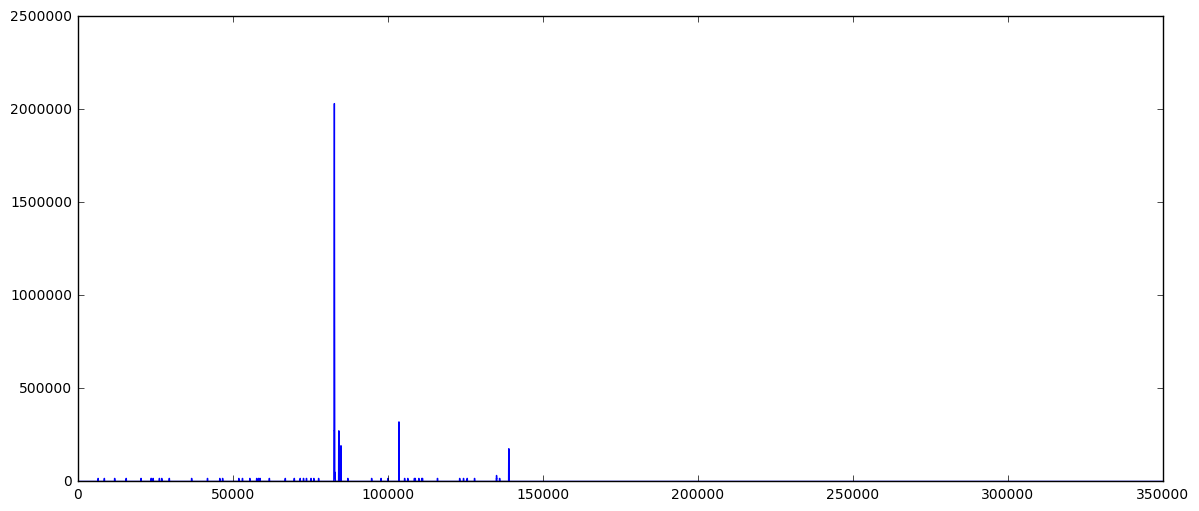

In [8]:
### Plot of waveforms for each pmt summed up

sum_waveforms = waveforms_in_channels[0].drop("event_number", axis=1).sum(axis=1)

fig = plt.figure(figsize=(14,6))
ax = plt.subplot(111)
fig = ax.plot(sum_waveforms.index, sum_waveforms)

In [66]:
event_truths[0]

,fax_truth_peak_id,event,g4_id,instruction,n_electrons,n_photons,peak_type,repetition,t_first_electron,t_first_photon,...,t_last_electron,t_last_photon,t_mean_electrons,t_mean_photons,t_sigma_electrons,t_sigma_photons,top_fraction,x,y,z
0,0,0,-1,0,16.0,379,s2,0,826638.620366,8.267593e+05,...,828324.404529,8.290946e+05,827641.784142,8.279530e+05,404.286682,410.426691,0.675462,4.517730,27.061374,-24.814994
1,1,0,-1,0,NaN,16,photoionization_afterpulse,0,NaN,1.390559e+06,...,NaN,1.391185e+06,NaN,1.390809e+06,NaN,165.495422,0.625000,-46.204034,2.173650,-0.500000
2,2,0,-1,0,NaN,25,photoionization_afterpulse,0,NaN,1.036173e+06,...,NaN,1.036733e+06,NaN,1.036475e+06,NaN,146.108306,0.760000,-28.172135,23.369638,-0.500000
3,3,0,-1,0,NaN,15,photoionization_afterpulse,0,NaN,8.490969e+05,...,NaN,8.494908e+05,NaN,8.492659e+05,NaN,113.777219,0.466667,-4.167860,27.947109,-0.500000
4,4,0,-1,0,NaN,26,photoionization_afterpulse,0,NaN,8.420800e+05,...,NaN,8.428152e+05,NaN,8.423495e+05,NaN,167.032715,0.846154,44.117512,15.064367,-0.500000


In [72]:

####################################################################################################
# NEST Truth
####################################################################################################

#geant_cols = ['event', 'type', 'x', 'y', 'z', 's1_photons_true', 's2_electrons_true', 't']
geant_cols = ['event', 'type', 'x', 'y', 'z', 's1_photons_true', 's2_electrons_true']

geant_truth_file       = "../data/FakeWaveform.csv"
df_geant_truth         = pd.read_csv(geant_truth_file)
df_geant_truth.columns = ['event', 'type', 'x', 'y', 'z', 's1_photons_true', 's2_electrons_true', 't'] 
df_geant_truth         = df_geant_truth[geant_cols]
lgth                  = len(df_geant_truth.index)
df_geant_truth.index   = np.arange(1, len(df_geant_truth) + 1)


####################################################################################################
####################################################################################################

print("")
print("Geant4 events: " + str(len(df_geant_truth.index)))
print("")
display(df_geant_truth[:5][:])
print("")




Geant4 events: 1000



,event,type,x,y,z,s1_photons_true,s2_electrons_true,t
1,0,ER,4.628629,27.725661,24.814994,5,20,650000.0
2,1,ER,2.626434,-17.960824,57.456815,164,79,650000.0
3,2,ER,-32.844888,-21.247503,25.655845,11,22,650000.0
4,3,ER,10.907536,-6.312277,57.780505,212,75,650000.0
5,4,ER,12.190372,-35.645256,46.617485,16,29,650000.0


In [82]:

####################################################################################################
# Number of S1's 
####################################################################################################

cols = ['event', 'peak_type', 't_mean_photons', 't_mean_electrons']




In [83]:

####################################################################################################
####################################################################################################

nEventsNest        = len(event_truths)
nEventsNestMissing = nEventsGeant - nEventsNest


####################################################################################################
####################################################################################################

print("")
print("Event Statistics")
print("----------------------------------------------------------------------------------------------------")
print("")
print("Geant4                          :   " + str(nEventsGeant))
print("NEST                            :   " + str(nEventsNest) + "   (" + str(nEventsNestMissing) + " missing )" )
print("")



Event Statistics
----------------------------------------------------------------------------------------------------

Geant4                          :   1000
NEST                            :   993   (7 missing )



In [112]:

####################################################################################################
####################################################################################################

print("")

df_num_s1 = pd.DataFrame(columns=['event', 's1_num']) 
df_num_s2 = pd.DataFrame(columns=['event', 's2_num']) 

df_t_mean_s1 = pd.DataFrame(columns=['event', 't_mean_photons']) 
df_t_mean_s2 = pd.DataFrame(columns=['event', 't_mean_electrons']) 

npa_missing = np.array([])

i_start = 0
i_end   = nEventsNest

index     = start
event_num = 0

for i in range(i_start, i_end):
    
    #print("i: " + str(i))
    
    
    ################################################################################################
    ################################################################################################

    try:
        
        df1 = event_truths[i]
        df2 = df1[:][cols]
    
    except Exception as e:
        
        print("Exception reading truth for event " + str(i) + ": " + str(e))
        
        break
    

    ################################################################################################
    ################################################################################################
    
    try:
        
        event_num = df2.iloc[0]['event']
        
    except Exception as e:
        
        print("Exception reading event data (df2.iloc[0]['event']): " + str(e))
        print("   i=" + str(i) + ", index=" + str(index) + ", (last) event_num=" + str(event_num))
        
        npa_missing = np.append(npa_missing, [index])
        
        index += 1
        
        continue
    
    
    ################################################################################################
    ################################################################################################
    
    if (event_num != index):
        
        print("Event: " + str(index) + ", i: " + str(i) + " is missing")
        
        npa_missing = np.append(npa_missing, [index])
        
        index += 1
        
    index += 1
    
    
    
    ################################################################################################
    # Number of S1 & S2
    ################################################################################################
    
    df3       = df2.loc[df2['peak_type'] == 's1']
    n_s1      = (df3['peak_type'] == 's1').count()
    df_s1_add = pd.DataFrame([[event_num, n_s1]], columns=['event', 's1_num'])
    df_num_s1 = df_num_s1.append(df_s1_add, ignore_index=False)
    
    df_s2     = df2.loc[df2['peak_type'] == 's2']
    n_s2      = (df_s2['peak_type'] == 's2').count()
    df_s2_add = pd.DataFrame([[event_num, n_s2]], columns=['event', 's2_num'])
    df_num_s2 = df_num_s2.append(df_s2_add, ignore_index=False)
    
    
    ################################################################################################
    # Times for S1
    ################################################################################################

    df4 = pd.DataFrame({'event': [event_num], 't_mean_photons': [np.nan]})
    df5 = df2.loc[df2['peak_type'] == 's1'][['event', 't_mean_photons']]

    if (len(df5.index) > 0):
        
        if (len(df5.index) == 1):
            df4 = df5
            
        else:

            print("Error: Multiple S1 times not hanled!")
            
    df_t_mean_s1 = df_t_mean_s1.append(df4)
            

     
    ################################################################################################
    # Times for S2
    ################################################################################################

    df6 = pd.DataFrame({'event': [event_num], 't_mean_electrons': [np.nan]})
    df7 = df2.loc[df2['peak_type'] == 's2'][['event', 't_mean_electrons']]

    if (len(df7.index) > 0):
        
        if (len(df7.index) == 1):
            df6 = df7
            
        else:

            print("Error: Multiple S2 times not hanled!")
            
    df_t_mean_s2 = df_t_mean_s2.append(df6)
            
    
####################################################################################################
####################################################################################################

print("")
print("Events in s1 dataframe: " + str(len(df_num_s1.index)) ) 
print("Events in s2 dataframe: " + str(len(df_num_s2.index)) ) 
print("")
print("Missing " + str(nEventsNestMissing) + " of " + str(nEventsGeant) + " events: (" + str(npa_missing) + ")")
print("")




Event: 138, i: 138 is missing
Event: 350, i: 349 is missing
Event: 372, i: 370 is missing
Event: 554, i: 551 is missing
Event: 628, i: 624 is missing
Event: 674, i: 669 is missing
Exception reading event data (df2.iloc[0]['event']): single positional indexer is out-of-bounds
   i=842, index=848, (last) event_num=847

Events in s1 dataframe: 992
Events in s2 dataframe: 992

Missing 7 of 1000 events: ([ 138.  350.  372.  554.  628.  674.  848.])



In [113]:
#display(df_num_s1[:3][:])
#display(df_num_s2[:3][:])

In [118]:

####################################################################################################
####################################################################################################

df_num_s1s2 = df_num_s1.merge(df_num_s2, left_on='event', right_on='event')
df_num_s1s2 = df_num_s1s2.merge(df_t_mean_s1, left_on='event', right_on='event')
df_num_s1s2 = df_num_s1s2.merge(df_t_mean_s2, left_on='event', right_on='event')

print("Events in dataframe: " + str(len(df_num_s1s2.index)) ) 
print("")
display(df_num_s1s2[:3][:])
print("")


Events in dataframe: 992



,event,s1_num,s2_num,t_mean_photons,t_mean_electrons
0,0.0,0.0,1.0,NaN,8.276418e+05
1,1.0,1.0,1.0,655077.777458,1.055127e+06
2,2.0,1.0,1.0,655072.962416,8.333101e+05


In [125]:

####################################################################################################
####################################################################################################

print("")
print("NEST  events         : " + str(len(df_num_s1s2.index)))
print("Geant events         : " + str(len(df_geant_truth.index)))

#df_s1s2 = pd.concat([df_geant_truth, df_num_s1s2], axis=1, join="inner")

df_s1s2 = df_geant_truth.merge(df_num_s1s2, left_on='event', right_on='event')

print("Combined Truth events: " + str(len(df_s1s2.index)))

df_s1s2['dt']  = df_s1s2.t_mean_electrons - df_s1s2.t_mean_photons
df_s1s2['r']   = np.sqrt(df_s1s2.x*df_s1s2.x + df_s1s2.y*df_s1s2.y)
df_s1s2['phi'] = np.arctan2(df_s1s2.y, df_s1s2.x)


print("")
display(df_s1s2[:4][:])
print("")



NEST  events         : 992
Geant events         : 1000
Combined Truth events: 992



,event,type,x,y,z,s1_photons_true,s2_electrons_true,t,s1_num,s2_num,t_mean_photons,t_mean_electrons,dt,r,phi
0,0,ER,4.628629,27.725661,24.814994,5,20,650000.0,0.0,1.0,NaN,8.276418e+05,NaN,28.109367,1.405378
1,1,ER,2.626434,-17.960824,57.456815,164,79,650000.0,1.0,1.0,655077.777458,1.055127e+06,400049.699577,18.151841,-1.425594
2,2,ER,-32.844888,-21.247503,25.655845,11,22,650000.0,1.0,1.0,655072.962416,8.333101e+05,178237.185795,39.118321,-2.567397
3,3,ER,10.907536,-6.312277,57.780505,212,75,650000.0,1.0,1.0,655089.037260,1.057330e+06,402240.825728,12.602348,-0.524616


In [12]:

####################################################################################################
####################################################################################################

n_singleS1_and_singleS2      = len(df_s1s2.loc[((df_s1s2['s1_num'] == 1) & (df_s1s2['s2_num'] == 1))].index)
n_nonSingleS1_or_nonSingleS2 = len(df_s1s2.loc[((df_s1s2['s1_num'] != 1) | (df_s1s2['s2_num'] != 1))].index)

n_zeroS1                     = len(df_s1s2.loc[(df_s1s2['s1_num'] == 0)].index)
n_zeroS2                     = len(df_s1s2.loc[(df_s1s2['s2_num'] == 0)].index)
n_zeroS1_or_zeroS2           = len(df_s1s2.loc[((df_s1s2['s1_num'] == 0) | (df_s1s2['s2_num'] == 0))].index)
n_zeroS1_and_zeroS2          = len(df_s1s2.loc[((df_s1s2['s1_num'] == 0) & (df_s1s2['s2_num'] == 0))].index)

n_multipleS1                 = len(df_s1s2.loc[(df_s1s2['s1_num'] >= 2)].index)
n_multipleS2                 = len(df_s1s2.loc[(df_s1s2['s2_num'] >= 2)].index)
n_multipleS1_or_multiple_S2  = len(df_s1s2.loc[ (df_s1s2['s1_num'] >= 2) | (df_s1s2['s2_num'] >= 2) ].index)



####################################################################################################
####################################################################################################

print("")
print("Event Statistics")
print("----------------------------------------------------------------------------------------------------")

print("")
print("Geant4                          :   " + str(nEventsGeant))
print("NEST                            :   " + str(nEventsNest))
print("NEST Missing                    :   " + str(nEventsNestMissing))
print("")
print("Single S1 AND Single S2         :   " + str(n_singleS1_and_singleS2))
print("Non-Single S1 OR Non-Single S2  :   " + str(n_nonSingleS1_or_nonSingleS2))
print("")
print("Zero S1 OR Zero S2              :   " + str(n_zeroS1_or_zeroS2))
print("   Zero S1                      :   " + str(n_zeroS1))
print("   Zero S2                      :   " + str(n_zeroS2))
print("   Zero S1 AND Zero S2          :   " + str(n_zeroS1_and_zeroS2))
print("")     
print("Multiple S1 OR Multiple S2      :   " + str(n_multipleS1_or_multiple_S2))
print("   Multiple S1                  :   " + str(n_multipleS1))
print("   Multiple S2                  :   " + str(n_multipleS2))
print("")     


####################################################################################################
####################################################################################################

cErr0 = (nEventsGeant - nEventsNestMissing != nEventsNest)
cErr1 = (nEventsNest != len(df_s1s2.index))
cErr2 = (nEventsNest != n_singleS1_and_singleS2 + n_nonSingleS1_or_nonSingleS2)
cErr3 = (n_zeroS1_or_zeroS2          != n_zeroS1     + n_zeroS2)
cErr4 = (n_multipleS1_or_multiple_S2 != n_multipleS1 + n_multipleS2)


if (cErr0 | cErr1 | cErr2 | cErr3 | cErr4):
    print("")     
    print("----------------------------------------------------------------------------------------------------")
    print("")     
    print("Counting Error!")
    print("cErr0: " + str(cErr0))
    print("cErr1: " + str(cErr1))
    print("cErr2: " + str(cErr2))
    print("cErr3: " + str(cErr3))
    print("cErr4: " + str(cErr4))
    print("")     
    


Event Statistics
----------------------------------------------------------------------------------------------------

Geant4                          :   999
NEST                            :   992
NEST Missing                    :   7

Single S1 AND Single S2         :   924
Non-Single S1 OR Non-Single S2  :   67

Zero S1 OR Zero S2              :   67
   Zero S1                      :   65
   Zero S2                      :   2
   Zero S1 AND Zero S2          :   0

Multiple S1 OR Multiple S2      :   0
   Multiple S1                  :   0
   Multiple S2                  :   0


----------------------------------------------------------------------------------------------------

Counting Error!
cErr0: False
cErr1: True
cErr2: True
cErr3: False
cErr4: False



In [13]:

####################################################################################################
# Efficiencies
####################################################################################################

eNest = (nEventsGeant - nEventsNestMissing) / nEventsGeant


####################################################################################################
####################################################################################################

print("")
print("Efficiency (NEST/Geant)  : " + str(eNest))
print("")



Efficiency (NEST/Geant)  : 0.992992992992993



In [11]:
type(event_truths)

list

In [12]:
type(event_truths[0])

pandas.core.frame.DataFrame

In [13]:
event_truths[3]

,fax_truth_peak_id,event,g4_id,instruction,n_electrons,n_photons,peak_type,repetition,t_first_electron,t_first_photon,...,t_last_electron,t_last_photon,t_mean_electrons,t_mean_photons,t_sigma_electrons,t_sigma_photons,top_fraction,x,y,z
21,21,4,-1,4,16.0,325,s2,0,977975.654754,978075.090505,...,980401.837409,981103.962199,979291.742446,979662.714087,635.786755,658.507885,0.667692,11.533362,-33.724126,-46.617485


In [14]:

####################################################################################################
####################################################################################################

sel_s1   = (df_test2['peak_type'] == 's1')
sel_s2   = (df_test2['peak_type'] == 's2')
sel_s1s2 = (sel_s1 | sel_s2)


####################################################################################################
####################################################################################################

def get_df(df_in):

    df1 = df_in
    df2 = df1[['event', 'peak_type']]
    
    df3 = df_test2['peak_type'] == 's2'
    
    
    #df1 = df_in[i][:].loc[df_in['event'] == i+1]
        
    #df2 = df1.loc[df1['event'] == i+1]
    #df3 = df2.loc[df2['peak_type'] == 's2']

    display(df3)
    
    return df1


####################################################################################################
# Panel
# 1st index is event number
# 2nd index is...
# 3rd index is...
####################################################################################################

d = { }

for i in range(1, 3):
    
    get_df(event_truths[i])


pan = pd.Panel(d)

pan[0]

####################################################################################################
####################################################################################################

#print(pan.shape)

#pan[0]


NameError: name 'df_test2' is not defined

In [15]:

####################################################################################################
####################################################################################################

df_test = event_truths[0]

#print("")
#display(df_test)

####################################################################################################
####################################################################################################


sel_s1   = (df_test2['peak_type'] == 's1')
sel_s2   = (df_test2['peak_type'] == 's2')
sel_s1s2 = (sel_s1 | sel_s2)


####################################################################################################
####################################################################################################

cols = ['event', 'x', 'y', 'z', 'peak_type', 'n_electrons', 'n_photons', 't_first_photon', 't_mean_photons', 't_last_photon', 't_first_electron', 't_mean_electrons', 't_last_electron']

df_test2 = df_test[:][cols]

df_test2 = df_test2[sel_s1s2][:]



print("")
display(df_test2)
print("")

NameError: name 'df_test2' is not defined

In [ ]:

####################################################################################################
####################################################################################################

cols = ['x', 'y', 'z', 'n_photons', 't_first_photon', 't_last_photon', 't_mean_photons', 'peak_type']

df_xyz_true = df_test2.loc[df_test2['peak_type'] == 's1']
df_xyz_true = df_xyz_true[:][cols]

print("")
display(df_xyz_true)
print("")
df_xyz_true = df_xyz_true.reset_index()[cols]
display(df_xyz_true)
print("")


In [ ]:

####################################################################################################
####################################################################################################

print("")
display(df_test2[:][['x', 'y', 'z', 'peak_type', 'n_photons', 'n_electrons', 't_first_electron', 't_first_photon']])
print("")



KeyError: 0

In [30]:

####################################################################################################
####################################################################################################

pan[0]


,event,peak_type
6,1,s2
14,NaN,NaN


In [21]:

####################################################################################################
####################################################################################################

pan[1]


,event,peak_type
6,NaN,NaN
14,2,s2


In [78]:
pan[1]

,event,peak_type
6,NaN,NaN
14,2,s2
16,NaN,NaN
21,NaN,NaN
23,NaN,NaN
30,NaN,NaN
35,NaN,NaN
55,NaN,NaN
68,NaN,NaN
85,NaN,NaN


In [24]:


####################################################################################################
####################################################################################################

df_test = pan.loc[:, :, :]
print(df_test.shape)


####################################################################################################
####################################################################################################

df_test = pan.loc[0:1, :, :]
print(df_test.shape)
df_test[1]



(2, 10, 21)
(2, 10, 21)


,fax_truth_peak_id,event,g4_id,instruction,n_electrons,n_photons,peak_type,repetition,t_first_electron,t_first_photon,...,t_last_electron,t_last_photon,t_mean_electrons,t_mean_photons,t_sigma_electrons,t_sigma_photons,top_fraction,x,y,z
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,13,2,-1,2,NaN,2,s1,0,NaN,655054,...,NaN,655092,NaN,655073,NaN,18.6765,0.5,-32.8449,-21.2475,-25.6558
14,14,2,-1,2,13,246,s2,0,832421,832591,...,834372,834975,833310,833733,563.046,592.701,0.670732,-31.5762,-20.4268,-25.6558


In [270]:


####################################################################################################
####################################################################################################

nEvents_truth = len(event_truths)
nEvents_simul = len(events)

print("Events (truth): " + str(nEvents_truth))
print("Events (sim)  : " + str(nEvents_truth))




#print("Events (single S1): " + str(nEvents_truth))
#print("Events (single Ss): " + str(nEvents_truth))



Events (truth): 2
Events (sim)  : 2


(2, 10, 21)

In [275]:

####################################################################################################
####################################################################################################

print(type(events))
print(len(events))

print(type(events[0]))

<class 'list'>
2
<class 'pandas.core.frame.DataFrame'>


In [276]:

####################################################################################################
####################################################################################################

print(type(event_truths))
print(len(event_truths))



<class 'list'>
2


In [277]:

df_truth = event_truths[0]

In [278]:
df_truth

,fax_truth_peak_id,event,g4_id,instruction,n_electrons,n_photons,peak_type,repetition,t_first_electron,t_first_photon,...,t_last_electron,t_last_photon,t_mean_electrons,t_mean_photons,t_sigma_electrons,t_sigma_photons,top_fraction,x,y,z
5,5,1,-1,1,NaN,29,s1,0,NaN,6.550311e+05,...,NaN,6.551501e+05,NaN,6.550778e+05,NaN,32.208841,0.034483,2.626434,-17.960824,-57.456815
6,6,1,-1,1,32.0,764,s2,0,1.053706e+06,1.053837e+06,...,1.056341e+06,1.057203e+06,1.055127e+06,1.055459e+06,657.901854,678.571516,0.676702,2.488824,-17.019777,-57.456815
7,7,1,-1,1,NaN,23,photoionization_afterpulse,0,NaN,1.588175e+06,...,NaN,1.588743e+06,NaN,1.588460e+06,NaN,142.841918,0.652174,47.416537,4.326025,-0.500000
8,8,1,-1,1,NaN,30,photoionization_afterpulse,0,NaN,1.063021e+06,...,NaN,1.063584e+06,NaN,1.063262e+06,NaN,139.310171,0.600000,6.501793,12.179028,-0.500000
9,9,1,-1,1,NaN,19,photoionization_afterpulse,0,NaN,1.365220e+06,...,NaN,1.365713e+06,NaN,1.365479e+06,NaN,154.385169,0.526316,-10.587970,37.731992,-0.500000
10,10,1,-1,1,NaN,21,photoionization_afterpulse,0,NaN,1.393101e+06,...,NaN,1.393944e+06,NaN,1.393371e+06,NaN,168.065879,0.666667,-15.456438,12.185898,-0.500000
11,11,1,-1,1,NaN,26,photoionization_afterpulse,0,NaN,1.394373e+06,...,NaN,1.395161e+06,NaN,1.394621e+06,NaN,192.550195,0.653846,-43.696444,0.595208,-0.500000
12,12,1,-1,1,NaN,20,photoionization_afterpulse,0,NaN,1.104477e+06,...,NaN,1.105084e+06,NaN,1.104776e+06,NaN,181.621535,0.750000,-31.802839,23.183041,-0.500000


In [67]:

####################################################################################################
####################################################################################################

rows, cols = df_truth.shape

print(rows)
print(cols)

8
21


In [104]:

####################################################################################################
####################################################################################################

df_truth[0:rows][0:cols]


,fax_truth_peak_id,event,g4_id,instruction,n_electrons,n_photons,peak_type,repetition,t_first_electron,t_first_photon,...,t_last_electron,t_last_photon,t_mean_electrons,t_mean_photons,t_sigma_electrons,t_sigma_photons,top_fraction,x,y,z
5,5,1,-1,1,NaN,29,s1,0,NaN,6.550311e+05,...,NaN,6.551501e+05,NaN,6.550778e+05,NaN,32.208841,0.034483,2.626434,-17.960824,-57.456815
6,6,1,-1,1,32.0,764,s2,0,1.053706e+06,1.053837e+06,...,1.056341e+06,1.057203e+06,1.055127e+06,1.055459e+06,657.901854,678.571516,0.676702,2.488824,-17.019777,-57.456815
7,7,1,-1,1,NaN,23,photoionization_afterpulse,0,NaN,1.588175e+06,...,NaN,1.588743e+06,NaN,1.588460e+06,NaN,142.841918,0.652174,47.416537,4.326025,-0.500000
8,8,1,-1,1,NaN,30,photoionization_afterpulse,0,NaN,1.063021e+06,...,NaN,1.063584e+06,NaN,1.063262e+06,NaN,139.310171,0.600000,6.501793,12.179028,-0.500000
9,9,1,-1,1,NaN,19,photoionization_afterpulse,0,NaN,1.365220e+06,...,NaN,1.365713e+06,NaN,1.365479e+06,NaN,154.385169,0.526316,-10.587970,37.731992,-0.500000
10,10,1,-1,1,NaN,21,photoionization_afterpulse,0,NaN,1.393101e+06,...,NaN,1.393944e+06,NaN,1.393371e+06,NaN,168.065879,0.666667,-15.456438,12.185898,-0.500000
11,11,1,-1,1,NaN,26,photoionization_afterpulse,0,NaN,1.394373e+06,...,NaN,1.395161e+06,NaN,1.394621e+06,NaN,192.550195,0.653846,-43.696444,0.595208,-0.500000
12,12,1,-1,1,NaN,20,photoionization_afterpulse,0,NaN,1.104477e+06,...,NaN,1.105084e+06,NaN,1.104776e+06,NaN,181.621535,0.750000,-31.802839,23.183041,-0.500000


In [123]:

####################################################################################################
####################################################################################################

df_truth.loc[5, 'peak_type']


####################################################################################################
####################################################################################################

df_truth.loc[:, 'peak_type']


####################################################################################################
####################################################################################################

df_truth_s2 = df_truth.loc[df_truth['peak_type'] == 's2']



In [129]:

####################################################################################################
####################################################################################################

df_truth_s2[:][ ['x', 'y', 'z', 'n_photons'] ]


,x,y,z,n_photons
6,2.488824,-17.019777,-57.456815,764


In [85]:


####################################################################################################
# Headers
####################################################################################################


list(df_truth.columns.values)


['fax_truth_peak_id',
 'event',
 'g4_id',
 'instruction',
 'n_electrons',
 'n_photons',
 'peak_type',
 'repetition',
 't_first_electron',
 't_first_photon',
 't_interaction',
 't_last_electron',
 't_last_photon',
 't_mean_electrons',
 't_mean_photons',
 't_sigma_electrons',
 't_sigma_photons',
 'top_fraction',
 'x',
 'y',
 'z']

In [103]:

df_truth.at[1:1]


ValueError: At based indexing on an integer index can only have integer indexers

In [82]:
df_truth[0:0][0:0]

#print(df_truth[0:0][0:0].as_matrix())

,fax_truth_peak_id,event,g4_id,instruction,n_electrons,n_photons,peak_type,repetition,t_first_electron,t_first_photon,...,t_last_electron,t_last_photon,t_mean_electrons,t_mean_photons,t_sigma_electrons,t_sigma_photons,top_fraction,x,y,z


In [53]:

####################################################################################################
####################################################################################################

df_truth['n_photons'][:].as_matrix()


array([ 29, 764,  23,  30,  19,  21,  26,  20])